# Image Classification -- CIFAR-10 -- Resnet101
> This notebook demonstrates various techniques of effective Neural Network models training using the Callbacks mechanism of FastAI library (v1).

[`CIFAR-10` dataset](https://course.fast.ai/datasets)


## Getting the Data

In [0]:
from fastai.vision import *

In [0]:
from fastai.callbacks import *

In [4]:
path = untar_data(URLs.CIFAR) 

In [0]:
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(get_transforms())
        .add_test_folder()
        .databunch(bs=256)
        .normalize(imagenet_stats))

In [20]:
data

ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
ship,ship,ship,ship,ship
Path: /root/.fastai/data/cifar10;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
ship,airplane,ship,truck,cat
Path: /root/.fastai/data/cifar10;

Test: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: EmptyLabelList
,,,,
Path: /root/.fastai/data/cifar10

In [7]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

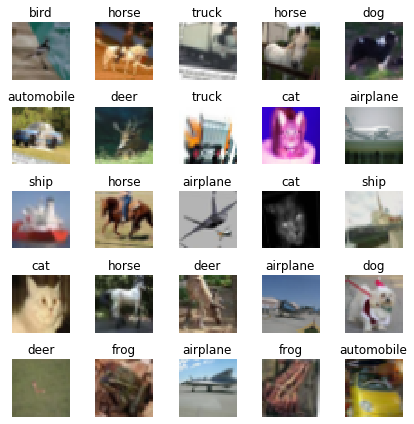

In [8]:
data.show_batch(figsize=(6,6))

In [0]:
results = pd.DataFrame(index=range(5))

## Randomly Initialized CONV Model

In [10]:
int(torch.cuda.max_memory_allocated(0)/(1024*1024))

4

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], pretrained=False, callback_fns=[CSVLogger,ShowGraph])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


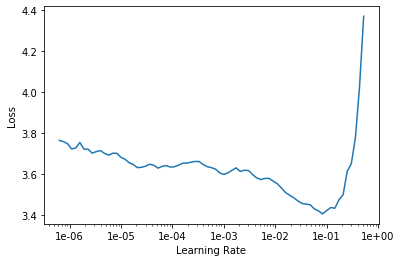

In [41]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.357704,2.542866,0.225500,01:49
1,1.929239,102.319199,0.286333,01:47
2,1.584136,56.509899,0.443833,01:47
3,1.341141,151.094666,0.551667,01:47
4,1.221145,56.869053,0.580333,01:46


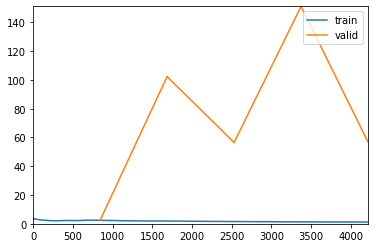

In [42]:
learn.fit_one_cycle(5,max_lr=2e-2)

In [45]:
results['resnet50'] = pd.read_csv(path/'history.csv',usecols=['accuracy'])
results.head()

,resnet50
0,0.225500
1,0.286333
2,0.443833
3,0.551667
4,0.580333


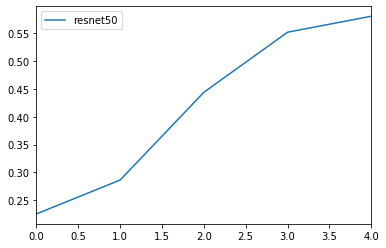

In [46]:
results.plot()

## Pretrained CONV net Model

In [0]:
learn = cnn_learner(data, models.resnet101, metrics=[accuracy], pretrained=True, callback_fns=[CSVLogger,ShowGraph])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


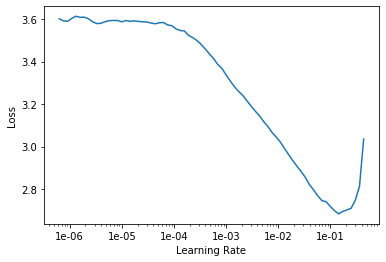

In [22]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,2.271758,2.654338,0.235583,01:44
1,2.068404,2.629152,0.278167,01:42
2,1.575158,1.778586,0.429750,01:41
3,1.277541,1.413217,0.536667,01:41
4,1.066930,12.048190,0.635917,01:40


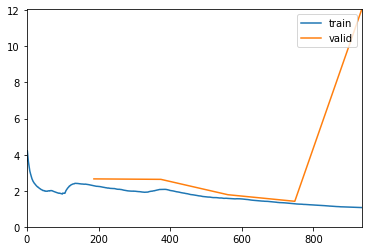

In [23]:
learn.fit_one_cycle(5,max_lr=2e-1)

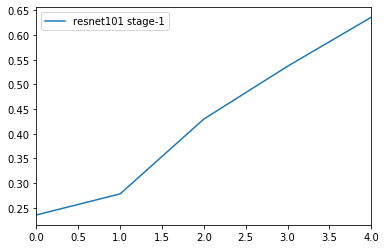

In [24]:
results['resnet101 stage-1'] = pd.read_csv(path/'history.csv',usecols=['accuracy'])
ax = results.plot(title='Model\'s Accuracy',xticks=[0,1,2,3,4])
ax.set_xlabel("Epoch of the Stage")

In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


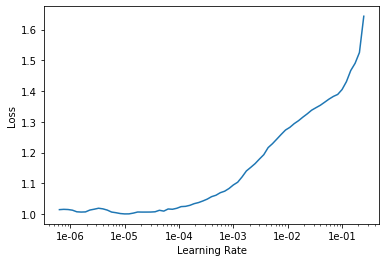

In [33]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.026937,6.422010,0.642917,01:49
1,1.018373,1.010670,0.642333,01:49
2,0.990238,5.418860,0.646667,01:49
3,0.995587,1.666115,0.645833,01:49
4,0.979671,1.628434,0.651333,01:50


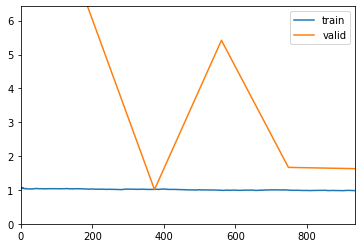

In [34]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-5))

In [0]:
learn.save('stage-2')

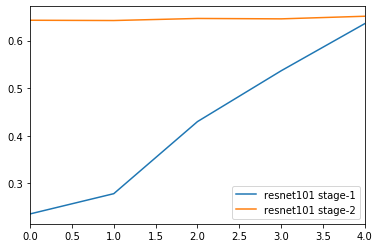

In [36]:
results['resnet101 stage-2'] = pd.read_csv(path/'history.csv',usecols=['accuracy'])
ax = results.plot(title='Model\'s Accuracy',xticks=[0,1,2,3,4])
ax.set_xlabel("Epoch of the Stage")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


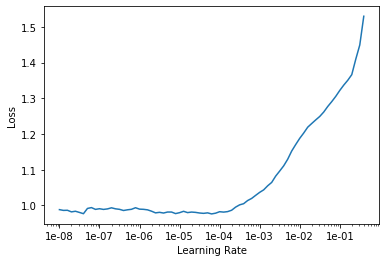

In [38]:
learn.lr_find(start_lr=1e-9)
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.974124,7.144644,0.659167,01:50
1,0.984295,8.854224,0.656667,01:49
2,0.969902,7.799942,0.653583,01:50
3,0.958520,1.253303,0.659667,01:50
4,0.947820,1.158069,0.664083,01:50


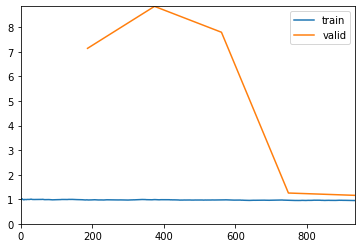

In [39]:
learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-5))

Text(0.5, 0, 'Epoch of the Stage')

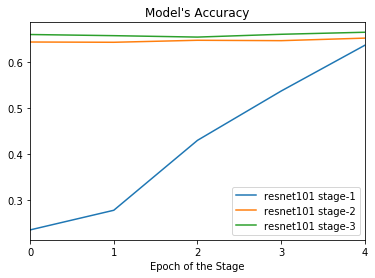

In [47]:
results['resnet101 stage-3'] = pd.read_csv(path/'history.csv',usecols=['accuracy'])
ax = results.plot(title='Model\'s Accuracy',xticks=[0,1,2,3,4])
ax.set_xlabel("Epoch of the Stage")

In [0]:
learn.save('stage-3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


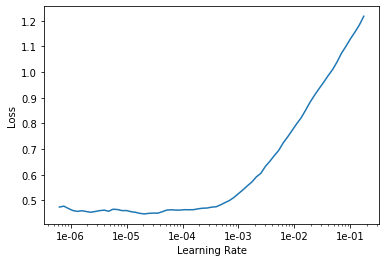

In [28]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.485009,0.488910,0.831667,01:19
1,0.473261,0.488016,0.831667,01:18
2,0.458254,0.475492,0.833500,01:16
3,0.450998,0.471915,0.839000,01:15
4,0.440244,0.474717,0.836833,01:15


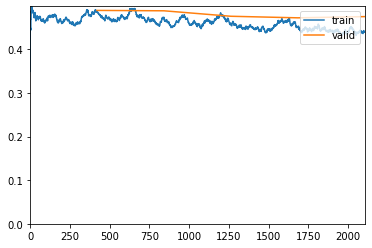

In [29]:
learn.fit_one_cycle(5,max_lr=slice(3e-6,3e-5))

In [0]:
learn.save('stage-4')

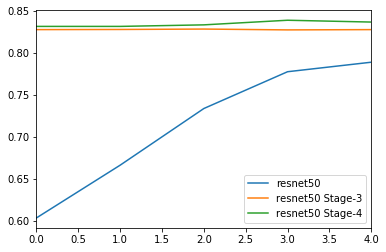

In [31]:
results['resnet50 Stage-4'] = pd.read_csv(path/'history.csv',usecols=['accuracy'])
results.plot()

## Results

In [32]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

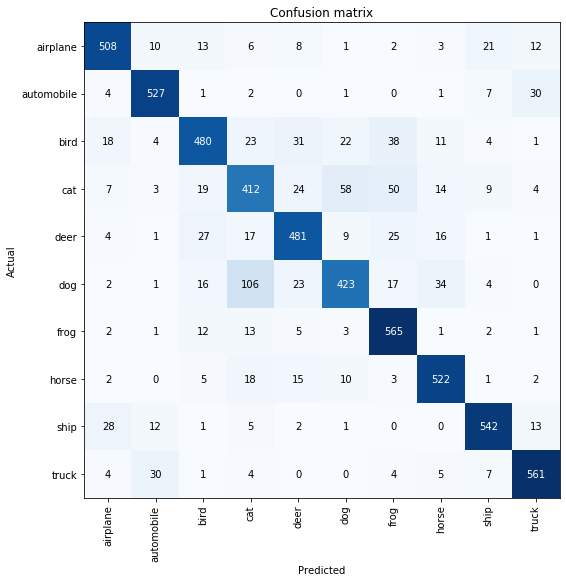

In [33]:
interp.plot_confusion_matrix(figsize=(8,8))

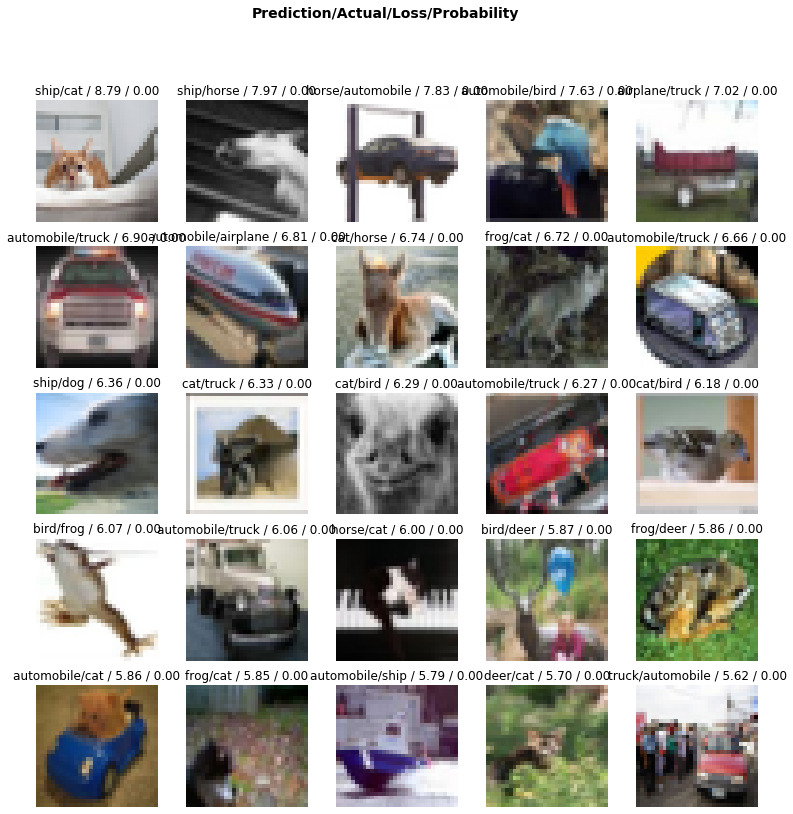

In [34]:
interp.plot_top_losses(25, figsize=(13,13))

In [35]:
interp.most_confused(min_val=3)

[('dog', 'cat', 106),
 ('cat', 'dog', 58),
 ('cat', 'frog', 50),
 ('bird', 'frog', 38),
 ('dog', 'horse', 34),
 ('bird', 'deer', 31),
 ('automobile', 'truck', 30),
 ('truck', 'automobile', 30),
 ('ship', 'airplane', 28),
 ('deer', 'bird', 27),
 ('deer', 'frog', 25),
 ('cat', 'deer', 24),
 ('bird', 'cat', 23),
 ('dog', 'deer', 23),
 ('bird', 'dog', 22),
 ('airplane', 'ship', 21),
 ('cat', 'bird', 19),
 ('bird', 'airplane', 18),
 ('horse', 'cat', 18),
 ('deer', 'cat', 17),
 ('dog', 'frog', 17),
 ('deer', 'horse', 16),
 ('dog', 'bird', 16),
 ('horse', 'deer', 15),
 ('cat', 'horse', 14),
 ('airplane', 'bird', 13),
 ('frog', 'cat', 13),
 ('ship', 'truck', 13),
 ('airplane', 'truck', 12),
 ('frog', 'bird', 12),
 ('ship', 'automobile', 12),
 ('bird', 'horse', 11),
 ('airplane', 'automobile', 10),
 ('horse', 'dog', 10),
 ('cat', 'ship', 9),
 ('deer', 'dog', 9),
 ('airplane', 'deer', 8),
 ('automobile', 'ship', 7),
 ('cat', 'airplane', 7),
 ('truck', 'ship', 7),
 ('airplane', 'cat', 6),
 ('frog